# input : Merge_Omdbdata_Company.csv

# goal：EDA 對資料做基本視覺化

# ouput：相關圖表

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
#from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import seaborn as sns
#from PIL import Image

In [2]:
omdb_data = pd.read_csv('./Merge_omdbdata_Company.csv')
omdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62020 entries, 0 to 62019
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     62020 non-null  object 
 1   Title                   62020 non-null  object 
 2   Year                    62020 non-null  object 
 3   Rated                   4695 non-null   object 
 4   Released                62020 non-null  int64  
 5   Runtime                 27870 non-null  object 
 6   Genre                   53561 non-null  object 
 7   Director                1158 non-null   object 
 8   Writer                  8428 non-null   object 
 9   Plot                    27847 non-null  object 
 10  Language                57768 non-null  object 
 11  Country                 59123 non-null  object 
 12  Awards                  7424 non-null   object 
 13  Ratings                 62020 non-null  object 
 14  imdbRating              26347 non-null

## understand Tv-show every year average porduct

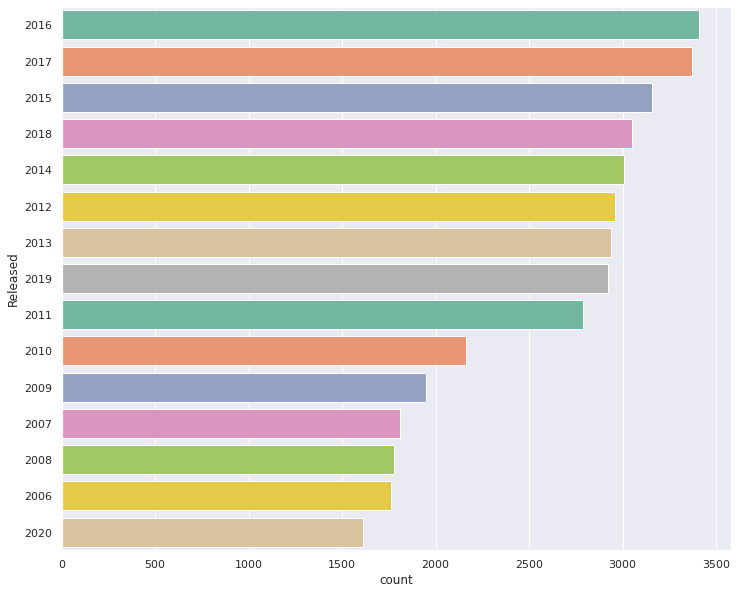

In [3]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Released", data=omdb_data, palette="Set2", order=omdb_data['Released'].value_counts().index[0:15])

# top 10 imdb rating in Tv-shows

In [4]:
ratings = pd.DataFrame({'Title':omdb_data.Title,
                    'Release Year':omdb_data.Released,
                    'Rating': omdb_data. imdbRating,
                    'Genre':omdb_data.Genre,
                    'Country':omdb_data.Country})
ratings

,Title,Release Year,Rating,Genre,Country
0,The Boys,2019,8.7,"Action, Comedy, Crime, Sci-Fi",USA
1,Schitt's Creek,2015,8.5,Comedy,"Canada, USA"
2,This Is Us,2016,8.7,"Comedy, Drama, Romance",USA
3,Cobra Kai,2018,8.7,"Action, Comedy, Drama, Sport",USA
4,The Office,2005,8.9,Comedy,USA
...,...,...,...,...,...
62015,Wild Cameramen at Work,2013,NaN,Documentary,UK
62016,Sesame Street: T is for Train,2018,NaN,Family,USA
62017,In2Minds,2004,NaN,Family,UK
62018,Schreinemakers,2004,NaN,Talk-Show,Germany


In [5]:
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)

In [6]:
ratings = ratings.dropna()

In [7]:
ratings

,Title,Release Year,Rating,Genre,Country
0,The Boys,2019,8.7,"Action, Comedy, Crime, Sci-Fi",USA
1,Schitt's Creek,2015,8.5,Comedy,"Canada, USA"
2,This Is Us,2016,8.7,"Comedy, Drama, Romance",USA
3,Cobra Kai,2018,8.7,"Action, Comedy, Drama, Sport",USA
4,The Office,2005,8.9,Comedy,USA
...,...,...,...,...,...
61997,"Bill Walton's Long, Strange Trip",2003,7.5,"Reality-TV, Sport",USA
62001,TV-uutiset ja sää,1960,6.2,News,Finland
62002,Zauberer Schmollo,1994,7.0,Family,Germany
62007,100 Greatest Artists of All Time,2010,7.0,Music,USA


In [8]:
ratings.sort_values(by='Rating', ascending=False)

,Title,Release Year,Rating,Genre,Country
55161,Blind Wave: Black Sails Reaction,2018,10.0,Talk-Show,USA
20929,Shiny New Things,2019,10.0,Drama,USA
13709,Once Upon A... Anonymous,2013,10.0,"Short, Comedy, Fantasy",USA
57444,À Brasileira,2019,10.0,Documentary,Brazil
27766,"Ommi Traki, nas mlah",1969,10.0,Comedy,Tunisia
...,...,...,...,...,...
38540,Josh Pieters Vlogs,2016,1.0,"Comedy, Reality-TV",UK
20009,Pirate school,2018,1.0,Animation,Russia
15306,Epic Stickmans,2015,1.0,"Animation, Action",Russia
54088,Weird Norwegian,2015,1.0,Reality-TV,Norway


In [9]:
import plotly.express as px
top_rated=ratings[0:10]
fig =px.sunburst(
    top_rated,
    path=['Title','Country'],
    values='Rating',
    color='Rating')
fig.show()